# Prerequisites

Install dependencies.

In [1]:
!pip install -qU pip pinecone-client

Set up Pinecone.

In [2]:
import pinecone
import os

api_key = os.getenv("PINECONE_API_KEY") or "USE_YOUR_API_KEY"
pinecone.init(api_key=api_key)

Check Pinecone version compatibility.

In [3]:
import pinecone.info

version_info = pinecone.info.version()
server_version = ".".join(version_info.server.split(".")[:2])
client_version = ".".join(version_info.client.split(".")[:2])
notebook_version = "0.8"

assert (
    notebook_version == server_version
), "This notebook is outdated. Consider using the latest version of the notebook."
assert client_version == server_version, "Please upgrade pinecone-client."

# Hello, Pinecone!

In [4]:
import pinecone.graph
import pinecone.service
import pinecone.connector

In [5]:
service_name = "hello-pinecone"

In [6]:
graph = pinecone.graph.IndexGraph()  # Create a Pinecone graph

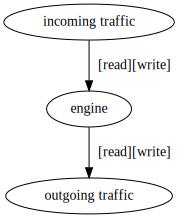

In [7]:
graph.view()  # view the graph

In [8]:
pinecone.service.deploy(service_name, graph)  # deploy the graph as a service

{'msg': '', 'success': True}

In [9]:
conn = pinecone.connector.connect(service_name)  # connect to the service

In [10]:
conn.upsert(items=[("A", [1, 1, 1]), ("B", [1, 1, 1])]).collect()  # insert vectors

[IndexResult(id='A'), IndexResult(id='B')]

In [11]:
conn.info()  # index info

InfoResult(index_size=2)

In [12]:
pinecone.service.stop(service_name=service_name)  # stop the service

{'success': True}